### Problema da mochila - Modelagem

Contextualização: Capturar o problema e gerar a solução dentro das regras de negócio.

Modelo de predição: Explica/mostra o que irá acontecer a partir de variáveis.
Modelo de otimização: Também faz uso de variáveis mas é mais específico para tomada de decisão.

Em resumo, através do output do modelo de predição temos uma noção do que pode acontecer no futuro.
Contudo, esse output não leva em conta as restrições e regras de negócio, que somente são consideradas na otimização.

### Caso da mochila

Capacidade máxima: 
   * Volume: 20 L
   * Peso: 10 kg

**Os itens**

Chocolate:
* Volume: 5 litros
* Peso: 1 KG
* Lucro: 13 R$/Caixa

Bandeja de Picanha:

* Volume: 2 Litro
* Peso: 2 KG
* Lucro: 8 R$/Bandeja

**Formulação Matemática**

Função Objetivo:
    
max Z = 13x + 8y - Lucro se eu levar X caixas de chocolate e Y bandejas de picanha
    
Restrições:
- $5x + 2y \leq20$ - Avaliado com base no volume suportado
- $x + 2y \leq10$ - Avaliado com base o peso suportado

Os numeros não podem ser negativos:
- $x\geq0$
- $y\geq0$

## Resolvendo o problema com o pulp

In [34]:
import pulp

In [58]:
# Instanciando o problema

bag_problem = pulp.LpProblem("Bag_Problem", pulp.LpMaximize)

# Declarando as variáveis
x = pulp.LpVariable('x', lowBound=0, cat='Continuous')
y = pulp.LpVariable('y', lowBound=0, cat= 'Continuous')

#obs.: lowBound = limite inferior. Caso haja um máximo, pode-se passar também o limite superior.

Adicionando a função objetivo e as Restrições, através do operador +=

In [59]:
#Função objetivo
bag_problem += 13*x + 8*y, 'Z'

#Restrições
bag_problem += 5*x + 2*y <= 20 
bag_problem += x + 2*y <= 10

Resolvendo o problema

In [60]:
bag_problem.solve() # Cria a solução
pulp.LpStatus[bag_problem.status] # Exibe o status da solução

'Optimal'

#### Status da solução

Pode ser:

- Ótima
- Infactível (não teremos a resposta de x e y, nem a função objetiva)
- ILimitada
- Múltipla (dois pontos com funções objetivas iguais - duas soluções com mesmo resultado)

Vizualizando a solução 

In [61]:
for variable in bag_problem.variables():
    print(f'{variable.name}= {variable.varValue}')

x= 2.5
y= 3.75


Valor da função objetivo

In [62]:
# Valor da função objetiva
print(pulp.value(bag_problem.objective))

62.5


In [63]:
bag_problem

Bag_Problem:
MAXIMIZE
13*x + 8*y + 0
SUBJECT TO
_C1: 5 x + 2 y <= 20

_C2: x + 2 y <= 10

VARIABLES
x Continuous
y Continuous

**Representação gráfica da região factível e do resultado encontrado**

In [64]:
import numpy as np
import matplotlib.pyplot as plt

Text(2.7, 3.75, 'Ponto ótimo (2.5, 3.75)')

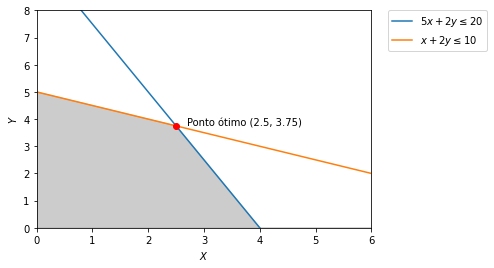

In [73]:
%matplotlib inline

# instanciando variáveis

x = np.linspace(0,24,2000) #Para traçar a linha
y1 = (20 - 5*x)/2 
y2 = (10 - x)/2

plt.plot(x, y1, label = r'$5x+2y\leq20$')
plt.plot(x, y2, label = r'$x + 2y \leq10$')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0) #Para criar a legenda

# Reduzindo aplitude dos valores dos eixos e nomeando-os.
plt.xlim((0,6))
plt.ylim((0,8))
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')

# Região factível - onde os resultados obedecem às restrições

y3 = np.minimum(y2,y1)
plt.fill_between(x,y3,color='grey', alpha = 0.4);

#Ponto ótimo

plt.plot(2.5,3.75, marker ='o', color = 'red')
plt.annotate('Ponto ótimo (2.5, 3.75)',xy=(2.7,3.75))

#plt.plot(a_min1, mass1, 'b.')

**Insights importantes**

Considerando que buscamos maximizar o resultado, em problemas lineares o ponto ótimo¹ sempre será em cima de uma restrição.
Contudo, muitas vezes essa resolução trará valores fracionados, o que nem sempre é uma solução factível. No caso aqui presente, as variáveis precisam ter valores inteiros para ser factível já que não podemos comprar 2,5 caixas de chocolate ou 3.75 bandejas de picanha, por exemplo.

¹Melhor resultado possível

### Dessa forma, muitas vezes precisamos definir que o resultado seja um valor inteiro no parametro cat:

In [66]:
# Instanciando o problema

bag_problem_int = pulp.LpProblem("Bag_Problem_int", pulp.LpMaximize)

# Declarando as variáveis
x = pulp.LpVariable('x', lowBound=0, cat='Integer')
y = pulp.LpVariable('y', lowBound=0, cat= 'Integer')

#Função objetivo
bag_problem_int += 13*x + 8*y, 'Z'

#Restrições
bag_problem_int += 5*x + 2*y <= 20 
bag_problem_int += x + 2*y <= 10

bag_problem_int.solve() # Cria a solução
pulp.LpStatus[bag_problem_int.status] # Exibe o status da solução

'Optimal'

In [67]:
for variable in bag_problem_int.variables():
    print(f'{variable.name}= {variable.varValue}')

x= 2.0
y= 4.0


In [68]:
# Valor da função objetiva
print(pulp.value(bag_problem_int.objective))

58.0


Text(0.1, 3.3, 'Solução factível: (2.0, 4.0)')

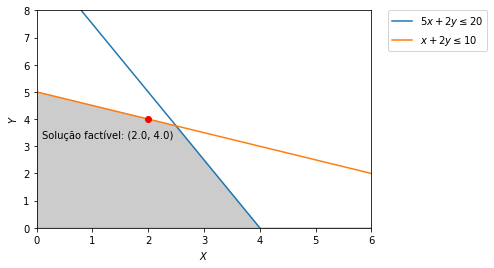

In [80]:
%matplotlib inline

# instanciando variáveis

x = np.linspace(0,24,2000) #Para traçar a linha
y1 = (20 - 5*x)/2 
y2 = (10 - x)/2

plt.plot(x, y1, label = r'$5x+2y\leq20$')
plt.plot(x, y2, label = r'$x + 2y \leq10$')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0) #Para criar a legenda

# Reduzindo amplitude dos valores dos eixos e nomeando-os.
plt.xlim((0,6))
plt.ylim((0,8))
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')

# Região factível - onde os resultados obedecem às restrições

y3 = np.minimum(y2,y1)
plt.fill_between(x,y3,color='grey', alpha = 0.4);

#Ponto ótimo

plt.plot(2.0,4.0, marker ='o', color = 'red')
plt.annotate('Solução factível: (2.0, 4.0)',xy=(0.1,3.3))

#plt.plot(a_min1, mass1, 'b.')

## Resolvendo o problema com o pyomo

In [1]:
#Biblioteca
from pyomo.environ import *

#Instanciando
model = ConcreteModel() # o model será uma variável local para armazenar o modelo que estamos criando.

#### Criando variáveis

In [2]:
model.x1 = Var(within = NonNegativeIntegers)
model.x2 = Var(within = NonNegativeIntegers) # Aqui já fizemos a restrição de obter apenas inteiros positivos

In [3]:
#verificação 
print(model.x1.domain)
print(model.x1.bounds)

NonNegativeIntegers
(0, None)


#### Função Objetivo

In [4]:
model.obj = Objective(
    expr = 13*model.x1 + 8*model.x2,
    sense = maximize) #Poderia ser minimize(default); obj é discricionário

#### Restrições

In [5]:
model.c1 = Constraint(expr = 5*model.x1 + 2*model.x2 <= 20) 
model.c2 = Constraint(expr = model.x1 + 2*model.x2 <= 10)

#### Checando todos os elementos

In [6]:
model.pprint()

2 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeIntegers
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeIntegers

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 13*x1 + 8*x2

2 Constraint Declarations
    c1 : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : 5*x1 + 2*x2 :  20.0 :   True
    c2 : Size=1, Index=None, Active=True
        Key  : Lower : Body      : Upper : Active
        None :  -Inf : x1 + 2*x2 :  10.0 :   True

5 Declarations: x1 x2 obj c1 c2


#### Resolvendo o modelo

In [7]:
optimizer = SolverFactory('glpk') #entre aspas o solver que utilizaremos. Alternativas: BARON, Cbc, cplex, Gurobi

In [8]:
import subprocess

def patched_subprocess_run(*args, **kwargs):
    if kwargs.get("timeout") is not None:
        kwargs["timeout"] = 7
    return orig_subprocess_run(*args, **kwargs)

orig_subprocess_run = subprocess.run
subprocess.run = patched_subprocess_run

results = optimizer.solve(model, tee = True) # definindo Tee como True o log do processo de resolução é mostrado

#Obs: A função patched_subprocess_run foi gerada para estender o tempo de execução da aplicação

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\JOOPAU~1\AppData\Local\Temp\tmp0d_lyral.glpk.raw --wglp
 C:\Users\JOOPAU~1\AppData\Local\Temp\tmpczgo1uob.glpk.glp --cpxlp C:\Users\JOOPAU~1\AppData\Local\Temp\tmpod97eltv.pyomo.lp
Reading problem data from 'C:\Users\JOOPAU~1\AppData\Local\Temp\tmpod97eltv.pyomo.lp'...
3 rows, 3 columns, 5 non-zeros
2 integer variables, none of which are binary
29 lines were read
Writing problem data to 'C:\Users\JOOPAU~1\AppData\Local\Temp\tmpczgo1uob.glpk.glp'...
22 lines were written
GLPK Integer Optimizer, v4.65
3 rows, 3 columns, 5 non-zeros
2 integer variables, none of which are binary
Preprocessing...
2 rows, 2 columns, 4 non-zeros
2 integer variables, none of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  5.000e+00  ratio =  5.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 2
Solving LP relaxation...
GLPK Simplex Optimizer, v4.6

#### Exibindo o status

In [9]:
print("status: ", results.solver.status) # Ok quer dizer que o software rodou normalmente

status:  ok


In [10]:
# Valor da função objetivo
print('Valor da função objetivo: ', model.obj.expr())

Valor da função objetivo:  58.0


In [11]:
 #Valor das variáveis

print("X1= ", model.x1.value)
print("X2= ", model.x2.value)

X1=  2.0
X2=  4.0
